# Taxpayer Risk Classification Project

## Project Overview

In many countries, tax evasion and non-compliance significantly reduce government revenue needed for critical services like education, infrastructure, and healthcare. While some taxpayers follow rules diligently, others exploit system loopholes or avoid taxes altogether.
Manual audit selection methods often depend on human judgment and limited resources, leading to inefficiencies and unfair targeting. However, by leveraging taxpayer data  such as revenue, expenses, filing behavior, and industry machine learning can help authorities flag potential high risk taxpayers more accurately. This enables smarter enforcement, early detection of risk, and a fairer tax ecosystem.


## Business Problem
Tax authorities face significant challenges in efficiently identifying taxpayers who are at high risk of non compliance or tax evasion. Without accurate risk profiling, audits and enforcement actions may be misallocated, leading to revenue losses and wasted resources. There is a need for a data driven approach to classify taxpayers based on their risk levels, enabling focused compliance efforts.
The challenge is to determine whether this existing taxpayer data can be used to **accurately classify taxpayers as high or low risk**, enabling smarter audit selection, reducing the burden on compliant taxpayers, and improving overall compliance.

> **How can we leverage taxpayer financial and behavioral data to automatically and accurately classify taxpayers by risk level, in order to support targeted audits, enhance compliance monitoring, and increase tax revenue efficiency?**

---

## Stakeholders
| Stakeholder             | Role / Interest                                                                                 |
|------------------------|------------------------------------------------------------------------------------------------|
| **Tax Authority / Revenue Service**| Responsible for tax collection, compliance enforcement, and overall revenue maximization.    |
| **Audit Teams**            | Use risk classifications to prioritize audits and investigations for efficient resource use.   |
| **Policy Makers**           | Use insights from the model to improve tax regulations and compliance strategies.               |
| **Taxpayers**               | Subject to audits and compliance monitoring; directly impacted by classification outcomes.     |
| **Data Analysts / Data Scientists** | Develop, validate, and maintain predictive models, providing actionable insights to stakeholders |

---

## Business Objectives
1. **How can we improve audit efficiency by prioritizing audits on high-risk taxpayers to reduce costs and increase revenue recovery?**

2. **How can we develop a predictive model to categorize taxpayers by risk level (Low, Medium, High) for ongoing compliance monitoring and early intervention?**

3. **How can we proactively identify potential non-compliant taxpayers to reduce tax evasion and maximize government revenue?**

---

## Analysis Objectives
- **How can we build and validate a machine learning classification model that accurately predicts the risk label of taxpayers based on their financial and behavioral features?**

- **Which features (e.g., revenue, expenses, late filings) most significantly influence the taxpayer risk classification and how can these insights inform targeted policy actions?**

---
## Data Understanding

We will use taxpayer financial and behavioral data to build a predictive model. The dataset includes records of individual and business taxpayers, featuring approximately **1000** observations and **13** columns.

## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

### Data Description

| Column Name              | Description                                                                                   | Data Type              |
|--------------------------|-----------------------------------------------------------------------------------------------|------------------------|
| `Taxpayer_ID`            | Unique identifier for each taxpayer                                                           | Categorical (ID)       |
| `Revenue`                | Total revenue reported by the taxpayer                                                        | Numeric (Continuous)   |
| `Expenses`               | Total expenses declared by the taxpayer                                                       | Numeric (Continuous)   |
| `Tax_Liability`          | Total tax amount the taxpayer is liable to pay                                                | Numeric (Continuous)   |
| `Tax_Paid`               | Actual tax amount paid by the taxpayer                                                        | Numeric (Continuous)   |
| `Late_Filings`           | Number of late tax return submissions                                                         | Numeric (Discrete)     |
| `Compliance_Violations` | Count of compliance violations reported                                                        | Numeric (Discrete)     |
| `Industry`               | Industry sector in which the taxpayer operates                                                | Categorical            |
| `Profit`                 | Net profit calculated as Revenue minus Expenses                                               | Numeric (Continuous)   |
| `Tax_Compliance_Ratio`   | Ratio of tax paid to tax liability                                                            | Numeric (Continuous)   |
| `Audit_Findings`         | Number of issues found during audits                                                          | Numeric (Discrete)     |
| `Audit_to_Tax_Ratio`     | Ratio of audit findings to tax liability or tax paid                                          | Numeric (Continuous)   |
| `Risk_Label`             | Target variable: classification of the taxpayer’s compliance risk (e.g., Low, Medium, High)   | Categorical (Target)   |



### Data Overview

Key features in the dataset include:

- **Demographics** – Taxpayer ID, age, industry, location.
- **Financial Data** – Reported revenue, deductible expenses, net income.
- **Behavioral Data** – Filing frequency, past audits, late submissions, and penalties.
- **Risk Labels** – Historical classification as high, medium, or low risk (target variable).

### Data Exploration Approach

To extract actionable insights and ensure data quality, we will:

- Load and inspect the dataset to understand its structure and feature types
- Handle missing values through imputation or removal depending on the nature and distribution
- Explore relationships between taxpayer behavior and risk level
- Visualize trends, outliers, and class imbalance (if any) before modeling


## Prediction Target

We are predicting the **Taxpayer Risk Label**, which categorizes taxpayers into different risk levels: **Low**, **Medium**, or **High** risk of non-compliance or tax evasion based on their financial data and compliance behavior

For this analysis, we will perform **binary classification**, focusing only on the **Low** and **High** risk categories. This classification helps tax authorities prioritize audits and enforcement actions more effectively



# Import modules & packages

In [106]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,classification_report 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

# Warnings
import warnings
warnings.filterwarnings('ignore')



# Load Dataset

In [107]:
data = pd.read_csv(r"C:\Users\Harriet\Downloads\PHASE 3 PROJECT\data\tax_risk_dataset.csv")
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


# EXPLORATORY DATA ANALYSIS

## Data Exploration

We will perform an initial exploration of the dataset to understand its structure and quality by:

- Previewing the first few rows to get a glimpse of the data  
- Examining the dataset’s dimensions and column names to identify the available features  
- Checking the data types and metadata to assess completeness and memory usage  
- Generating a statistical summary to understand the distribution and characteristics of numerical variables  
- Checking for missing values to identify any potential data quality issues that need to be addressed  


In [108]:
# DATA EXPLORATION
print("==========================DATA OVERVIEW============================")
print("\nPreview of the first five rows:")
print(data.head())

print(f"\nDataset shape: {data.shape}")
print(f"\nDataset columns: {list(data.columns)}")

print("==========================DATA TYPES===========================")
print("\nData types:")
print(data.dtypes)

print("==========================META DATA===========================")
print("\nMeta data:")
data.info()  

print("==========================STATISTICAL SUMMARY===========================")
print("\nStatistical summary:")
print(data.describe().round(2))



==========================DATA OVERVIEW============================

Preview of the first five rows:
   Taxpayer_ID     Revenue   Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
0            1  1149014.25  979871.09       39872.33  28921.92             2   
1            2   958520.71  884926.74       47832.22  39396.15             1   
2            3  1194306.56  711926.07       38113.70  43863.94             4   
3            4  1456908.96  570612.64       45380.58  66876.88             4   
4            5   929753.99  839644.66       21595.78  53565.53             0   

   Compliance_Violations       Industry     Profit  Tax_Compliance_Ratio  \
0                      1        Finance  169143.16                  0.73   
1                      1         Retail   73593.97                  0.82   
2                      0  Manufacturing  482380.49                  1.15   
3                      2        Finance  886296.32                  1.47   
4                      0           Tec

## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [109]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
Taxpayer_ID              0
Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'Taxpayer_ID'
Placeholders found: []
Count of placeholders: 0

Column: 'Revenue'
Placeholders found: []
Count of placeholders: 0

Column: 'Expenses'
Placeholders found: []
Count of placeholders: 0

Column: 'Tax_Liability'
Placeholders found: []
Count of placeholders: 0

The dataset has no missing,duplicated or placeholder values

Let's check if the dataset has any outliers and decide on whether to drop or keep them

In [110]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

Taxpayer_ID
Number of outliers: 0

Revenue
Number of outliers: 8

Expenses
Number of outliers: 8

Tax_Liability
Number of outliers: 10

Tax_Paid
Number of outliers: 5

Late_Filings
Number of outliers: 0

Compliance_Violations
Number of outliers: 0

Profit
Number of outliers: 5

Tax_Compliance_Ratio
Number of outliers: 51

Audit_Findings
Number of outliers: 0

Audit_to_Tax_Ratio
Number of outliers: 0



The dataset has a few outliers so let's try to visualize them

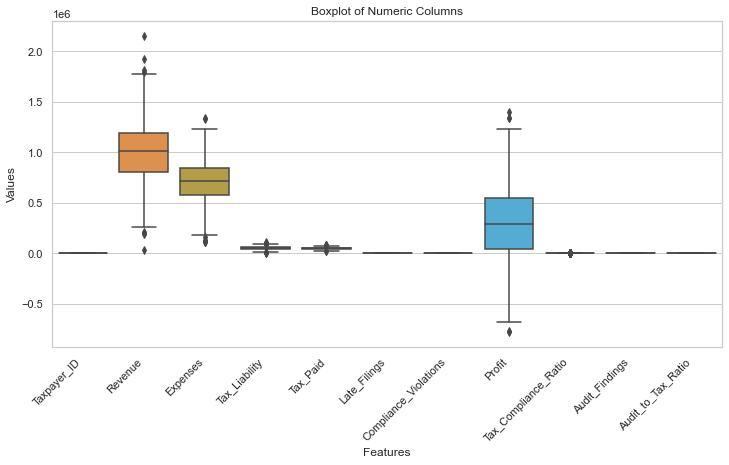

In [111]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

We will choose to retain them rather than drop them

# Data Preprocessing

In [112]:
data.columns

Index(['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
       'Late_Filings', 'Compliance_Violations', 'Industry', 'Profit',
       'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio',
       'Risk_Label'],
      dtype='object')

### Handling the Target Variable (`Risk_Label`)

- For binary classification let's filter the dataset to keep only the rows where the `Risk_Label` is either **"Low"** or **"High"**
- This ensures that only relevant classes are included in the analysis
  
- Let's manually map the categorical labels to numeric values:
  - `"Low"` is mapped to `0`
  - `"High"` is mapped to `1`


In [113]:
data = data[data["Risk_Label"].isin(["Low", "High"])]
data["Risk_Label"] = data["Risk_Label"].map({"Low": 0, "High": 1})


Let's now do a value count of the Risk Label column to see if the rows have 0 and 1

In [114]:
data["Risk_Label"].value_counts()

1    736
0    152
Name: Risk_Label, dtype: int64

# Analyzing the target variable 
- Let's visualize the frequency of each category in the Risk_Label feature to understand the distribution of risk classes in the dataset

1    736
0    152
Name: Risk_Label, dtype: int64


Text(0, 0.5, 'Count')

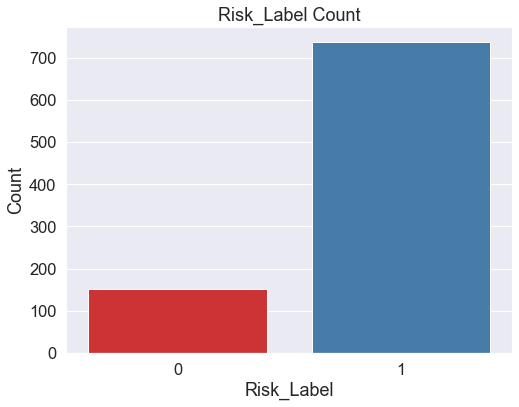

In [115]:
# Display value counts of unique items
print(data['Risk_Label'].value_counts())

# Set custom font parameters
sns.set(font_scale=1.5)
colors = sns.color_palette("Set1")
# Create a countplot of the 'Risk label' feature
plt.figure(figsize=(8, 6))  
sns.countplot(x='Risk_Label', data=data, palette=colors)
plt.title("Risk_Label Count")
plt.xlabel("Risk_Label")
plt.ylabel("Count")

- The plot shows that label 1 occurs more frequently than label 0, indicating class imbalance

## Class imbalance

In [116]:
# Class frequency of target variable 
print(data['Risk_Label'].value_counts())
print()
print(data['Risk_Label'].value_counts(normalize = True))

1    736
0    152
Name: Risk_Label, dtype: int64

1    0.828829
0    0.171171
Name: Risk_Label, dtype: float64


- Let's use a pie chart to visualize the classes 

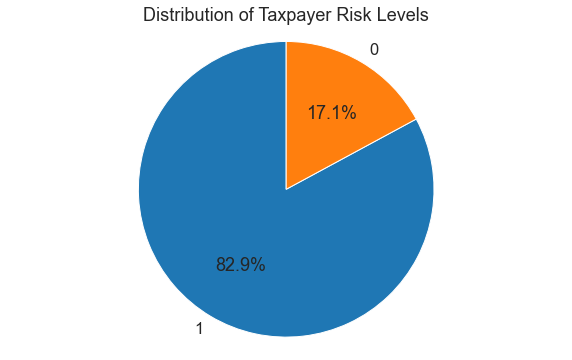

In [117]:
# Create a pie chart to visualize the Risk label
risk_counts = data['Risk_Label'].value_counts()
import seaborn as sns
colors = sns.color_palette('tab10', n_colors=len(risk_counts))
plt.figure(figsize=(10, 6))
plt.pie(risk_counts, 
        labels=risk_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors= colors)
plt.title('Distribution of Taxpayer Risk Levels')
plt.axis('equal')
plt.show()

- The target variable, Risk_Label, is imbalanced with 82.9% high risk (1) and 17.1% low risk (0) taxpayers. 
- This imbalance can cause models to favor the majority class, so we will use SMOTE technique  and appropriate evaluation metrics to correct the imbalance

## Feature Distributions by Risk Label

Let's use KDE plots to compare the distribution of each numerical feature across `Risk_Label = 0` (nonrisky) and `Risk_Label = 1` (risky) taxpayers. These visualizations will help us identify which features can distinguish between risky and non-risky behavior



In [118]:
print(data["Audit_to_Tax_Ratio"].nunique())
print(data["Audit_to_Tax_Ratio"].describe())

1
count    888.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Audit_to_Tax_Ratio, dtype: float64


- We will not plot the audit to tax ratio feature because all values are 0.0  so the plot will be a flat line or empty and will not show any separation between risky and non risky taxpayers

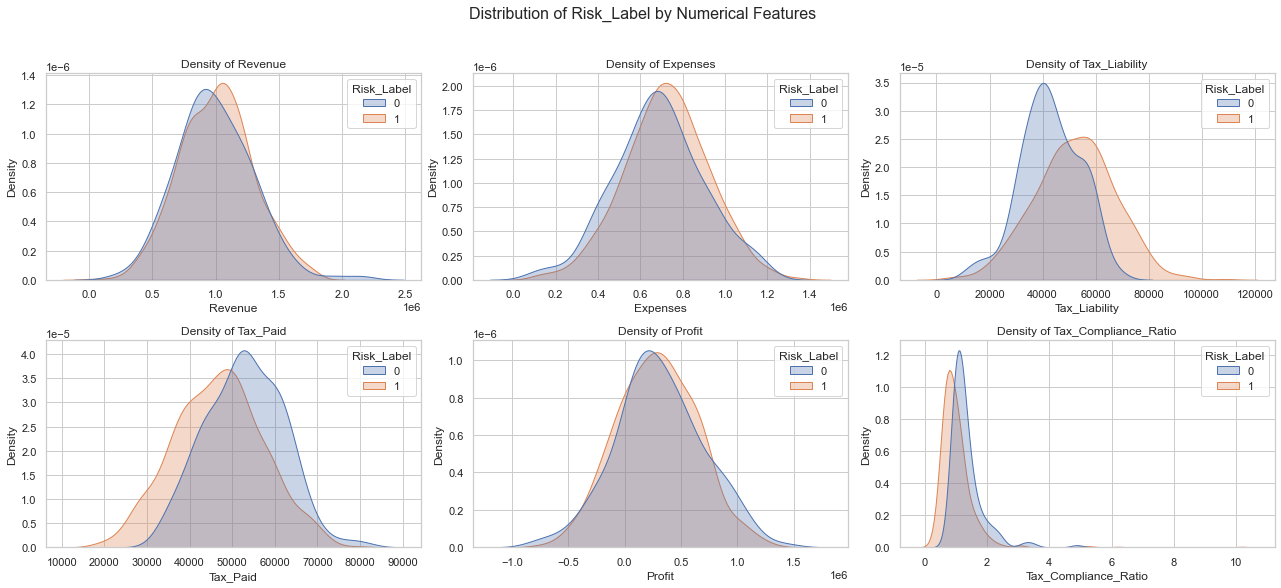

In [119]:
# List of numerical features to plot
numerical_features = [
    'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Profit',
    'Tax_Compliance_Ratio']

# Set up plot style
sns.set(style="whitegrid")

# Create subplots
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Plot KDEs
for idx, feature in enumerate(numerical_features):
    sns.kdeplot(
        data=data, x=feature, hue='Risk_Label',
        common_norm=False, fill=True, alpha=0.3,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Density of {feature}', fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')

# Hide any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# Overall title
plt.suptitle("Distribution of Risk_Label by Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### Key Features that show separation

**1. Tax_Compliance_Ratio**
- **Observation:** Risky taxpayers show a wider, flatter distribution with more density at lower compliance ratios
-  Non risky taxpayers peak sharply around values between 1 and 2
- **Interpretation:** Risky individuals tend to have lower tax compliance (they pay less than they owe)

**2. Tax_Paid**
- **Observation:** Risky taxpayers peak at lower values (40k–50k)  while non risky ones peak higher (55k–65k)
- **Interpretation:** High risk taxpayers generally pay less in taxes

**3. Tax_Liability**
- **Observation:** Risky taxpayers peak at higher liability amounts ( around 60k+) whereas non risky ones peak around 40k
- **Interpretation:** Risky individuals tend to owe more taxes, potentially due to underreporting or aggressive deductions


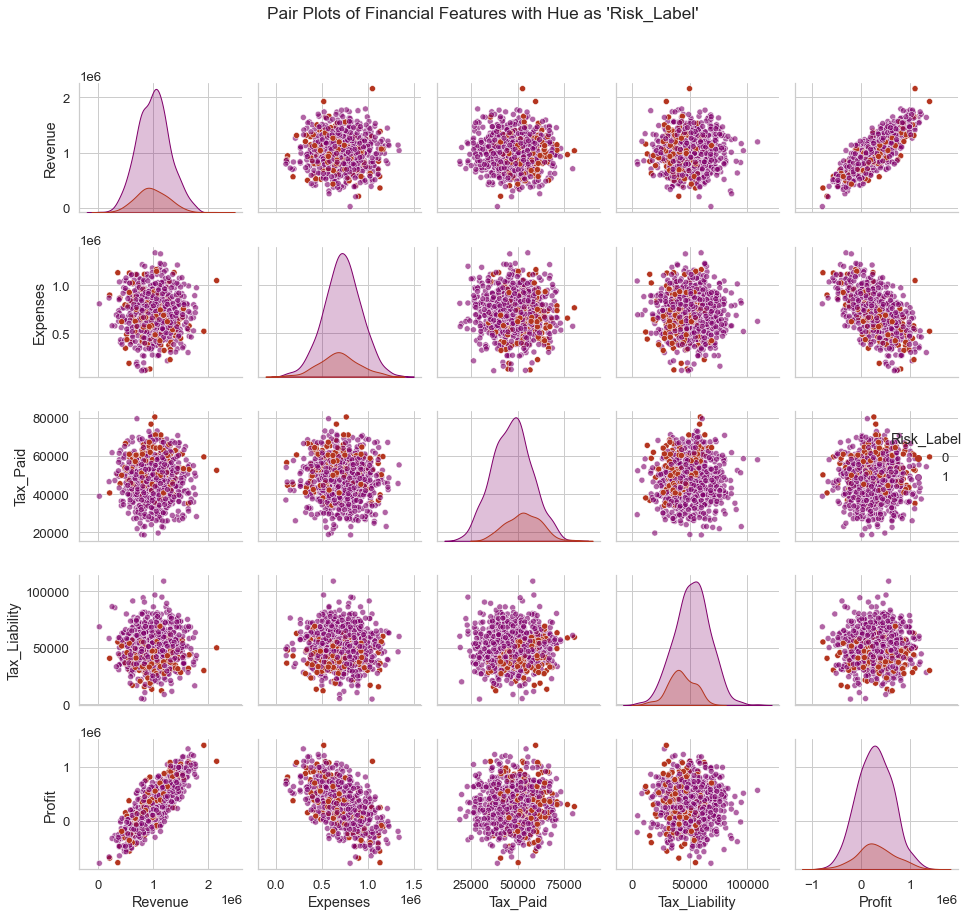

In [171]:
# Select relevant numerical features and include the target variable
selected_features = data[["Revenue", "Expenses", "Tax_Paid", "Tax_Liability", "Profit", "Risk_Label"]]


# Define a custom color palette for better class distinction
custom_palette = {0: "#b4351f", 1: "#80006B9B"}

# Create pair plots with 'Risk_Label' as hue
sns.pairplot(selected_features, hue="Risk_Label", height=2.5,palette=custom_palette,)
plt.suptitle("Pair Plots of Financial Features with Hue as 'Risk_Label'", y=1.02)
plt.tight_layout()
plt.show()

# Identify numerical and categorical columns

In [120]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols)
print()
print(categorical_cols)

['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio', 'Risk_Label']

['Industry']


### Visualizing  the distribution the categorical feature

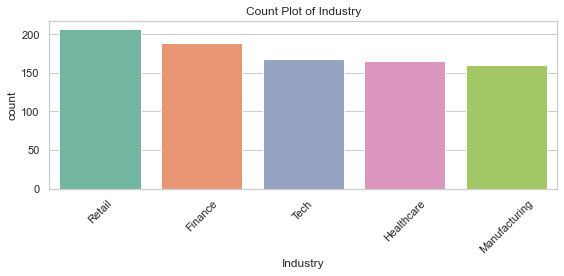

In [121]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Retain industriy is the most frequent one

# Correlation matrix for all the Numeric columns 

- Let's visualize how numerical features are correlated and  identify strong relationships 

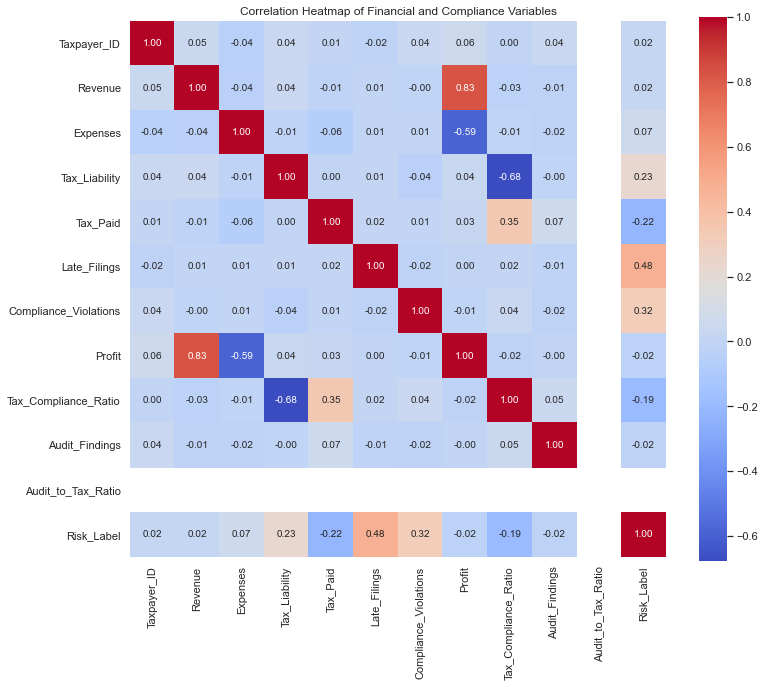

In [122]:
# Define numeric features from your dataset
numeric_features = numerical_cols

# Calculate correlation matrix
correlation_matrix = data[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            square=True,
            fmt=".2f",
            annot_kws={"size": 10})
plt.title("Correlation Heatmap of Financial and Compliance Variables")
plt.show()


- The heatmap reveals strong positive correlations between Revenue, Profit and Expenses indicating these financial metrics tend to rise together
- Tax_Paid also shows a moderate relationship with both Tax_Liability and Risk_Label linking payment behavior to risk
- On the negative side  Tax_Compliance_Ratio drops as Tax_Liability or Compliance_Violations increase suggesting poorer compliance in such cases
- Variables like Taxpayer_ID and Audit_Findings show little to no meaningful correlation with others

# PREDICTIVE MODELLING

## DATA PREPROCESSING

## Define the features

In [123]:
# Define X and y
X = data.drop(columns=['Taxpayer_ID', 'Risk_Label'])
y = data['Risk_Label']

We dropped Taxpayer_ID because it is a unique identifier for each individual and does not provide any predictive value for determining risk level. Including it in the model could lead to overfitting or noise, as it simply identifies a record rather than describing any meaningful behavior or financial attribute

# Train Test Split

In [124]:
## Create training and test sets
SEED = 42
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = SEED)

In [125]:
X_train.shape ,X_test.shape

((621, 11), (267, 11))

## Encode categorical data as numbers

Since all of our data  has some  categorical columns , we need to encode them as numbers using sklearn's `preprocessing` module  `OneHotEncoder`

In [126]:
# Define features explicitly based on your columns
numeric_features = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings',
                    'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio']

categorical_features = ['Industry']  


# One-hot encode categorical features in X_train
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features])
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features), index=X_train.index)

# Scale numeric features in X_train
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])
num_df = pd.DataFrame(X_train_num_scaled, columns=numeric_features, index=X_train.index)

# Combine numeric and categorical features for X_train
X_train_processed = pd.concat([num_df, ohe_df], axis=1)

# Show resulting DataFrame after preprocessing
X_train_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
539,-0.606654,-2.898203,0.027772,-0.135519,1.280228,-0.123269,1.131685,-0.281619,0.917179,0.0,1.0,0.0,0.0,0.0
324,-1.044140,-0.002580,-0.033320,1.076561,-1.419335,-0.123269,-0.847985,0.206433,-1.465951,0.0,0.0,0.0,0.0,0.0
192,0.199741,-0.659101,2.015430,2.205747,1.280228,-0.123269,0.532095,-0.335847,0.236285,0.0,1.0,0.0,0.0,0.0
500,0.925698,0.701312,0.548238,1.150158,-1.419335,-0.123269,0.359805,-0.082783,1.598074,0.0,0.0,0.0,0.0,0.0
397,1.361726,-1.024164,-1.040949,1.445904,-1.419335,-1.338355,1.682111,1.327147,-0.444610,0.0,0.0,0.0,1.0,0.0


### Applying SMOTE after preprocessing to balance training data

In [127]:
# Apply SMOTE after preprocessing to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)



Let's check the class distribution before and after applying SMOTE to see if the data is balanced after 

In [128]:
# check class distribution before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1: 520, 0: 101})
After SMOTE: Counter({1: 520, 0: 520})


- Before SMOTE  the dataset was imbalanced with more samples in class 1 than class 0 but after applying SMOTE, synthetic samples were added to the minority class (0) to balance both classes equally improving the dataset for better model training.So after SMOTE both classes have 520 samples (balanced)

###  Preprocess X_test using fitted transformers

In [129]:
# Preprocess X_test using fitted transformers
X_test_ohe = ohe.transform(X_test[categorical_features])

# Create DataFrame with proper column names for X_test
ohe_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features), index=X_test.index)

# Scale numeric features in X_test using the fitted scaler
X_test_num_scaled = scaler.transform(X_test[numeric_features])

# Convert scaled numeric features back to DataFrame
num_test_df = pd.DataFrame(X_test_num_scaled, columns=numeric_features, index=X_test.index)

# Combine scaled numeric features and one-hot encoded categorical features for X_test
X_test_processed = pd.concat([num_test_df, ohe_test_df], axis=1)
# Show resulting DataFrame after preprocessing X_test
X_test_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
311,1.101660,0.740166,1.784205,0.449156,1.280228,1.091816,0.481167,-0.697368,-1.465951,0.0,0.0,0.0,0.0,1.0
482,-1.656267,1.636635,1.983341,-0.328180,0.605337,-1.338355,-2.265180,-0.914280,-0.444610,0.0,0.0,1.0,0.0,0.0
42,-0.136425,0.997427,-0.556626,-0.544109,-0.744445,-1.338355,-0.670308,-0.118935,0.236285,0.0,0.0,0.0,0.0,0.0
463,0.199625,-0.904765,-1.276824,0.999530,-0.744445,1.091816,0.669761,1.417527,-0.785057,0.0,1.0,0.0,0.0,0.0
659,-0.165696,1.057768,0.530716,2.139478,-0.744445,1.091816,-0.727958,0.242585,-0.785057,0.0,0.0,0.0,0.0,1.0


- After preprocessing our dataset is ready for modelling

# MODELLING

### Modeling Approach

We will begin by building a **Logistic Regression** model as our baseline for evaluating classification performance. This simple and interpretable model will provide a benchmark for comparison

Next, we will implement a series of **Decision Tree** models to improve performance:

- **Untuned Decision Tree**: A basic model built using only `random_state=42` without any hyperparameter optimization
- **Tuned Decision Tree**: A model built with `random_state=42` and  the `criterion='entropy'` to evaluate splits based on information gain 
- **Manually Pruned Decision Tree**: A tree where we manually searched for optimal hyperparameters such as `max_depth`, `min_samples_split`, `min_samples_leaf` and `max_features` to reduce overfitting and improve generalization
- **GridSearchCV Pruned Decision Tree**: A model tuned using `GridSearchCV` to automate the search for the best combination of hyperparameters

We will evaluate all models using **Accuracy** and **ROC AUC** to assess their overall performance and ability to distinguish between classes


## MODEL 1:LOGISTIC MODEL(Baseline model)


Let's fit a **Logistic Regression** model on the SMOTE balanced training data 

In [156]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

Logistic Regression Accuracy: 0.9176029962546817


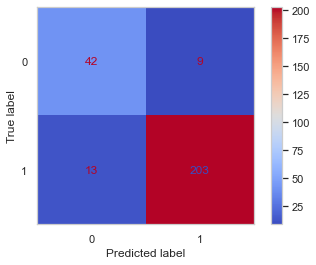

In [131]:
# Make predictions for the test data using your preprocessed X_test
y_pred = logreg.predict(X_test_processed)

# Calculate accuracy
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot with customizations
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.coolwarm, ax=ax)
ax.grid(False) 
plt.show()

203 True Positives: The model correctly predicted 203 high-risk taxpayers 
- directly supports audit prioritization and revenue recovery goals

13 False Negatives: The model missed 13  High-risk taxpayers 
- potential lost revenue and an area for model improvement

9 False Positives: 9 Low-risk taxpayers wrongly flagged as high-risk tax payers 
- may cause some unnecessary audits but impact is minor

42 True Negatives: The model correctly predicted 42 low-risk taxpayers 
- improves audit efficiency by avoiding unnecessary reviews

In [132]:
print("Logistic Regression Classification Report\n\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.76      0.82      0.79        51
           1       0.96      0.94      0.95       216

    accuracy                           0.92       267
   macro avg       0.86      0.88      0.87       267
weighted avg       0.92      0.92      0.92       267



### Interpretation of Logistic Regression Results

The Logistic Regression model achieved an overall **accuracy of 92%**, indicating strong general performance in classifying taxpayers into risk categories. 

- **Class 1 (High Risk)**: The model performs exceptionally well on the high-risk class, with a **precision of 0.96** and **recall of 0.94**. This means it accurately identifies high-risk taxpayers most of the time and rarely misses them. This supports our **business objective** of prioritizing audits on high-risk individuals to improve audit efficiency and maximize revenue recovery

- **Class 0 (Low Risk)**: Precision is **0.76** and recall is **0.82**, suggesting the model is reasonably good at identifying low-risk taxpayers but slightly more prone to misclassifying them. This is acceptable for now but could be improved to avoid unnecessary audits on compliant taxpayers

- **F1-scores** (0.79 for Class 0 and 0.95 for Class 1) reinforce that the model is particularly strong at identifying high-risk taxpayers, aligning well with our goal of early non-compliance detection and risk-based audit prioritization


- These results indicate that Logistic Regression is a strong starting point for building a taxpayer risk classification system enabling early intervention and focused compliance efforts
- Further tuning or trying more complex models may improve performance on the low-risk class and help fine tune risk thresholds



## Compute ROC & AUC 

In [133]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
log_roc_auc = auc(fpr,tpr)
print("Logistic roc_auc:",log_roc_auc)

Logistic roc_auc: 0.8816721132897604


### ROC and AUC Interpretation for Logistic Regression

The **ROC AUC score** for the Logistic Regression model is **0.88**. This means that the model has a strong ability to distinguish between high-risk and low-risk taxpayers 
- This performance suggests the model is effective in supporting the **business objective** of identifying high-risk taxpayers for audit prioritization and early intervention
- The  result confirms that Logistic Regression is a reliable baseline model for predicting taxpayer risk

To further improve performance, we will explore more  models and apply techniques like hyperparameter tuning and pruning


## Plot ROC CURVE

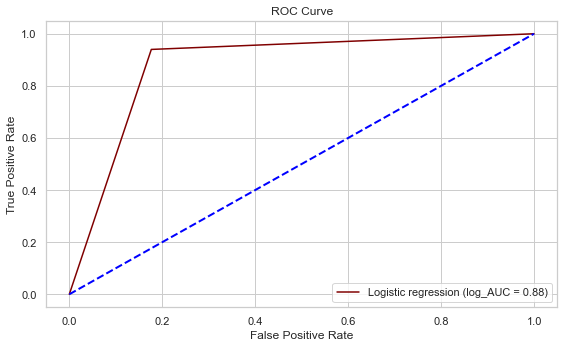

In [134]:
plt.figure(figsize=(8,5))
lw =2
plt.plot(fpr, tpr, label=f'Logistic regression (log_AUC = {log_roc_auc:.2f})',color ="maroon")
plt.plot([0, 1], [0, 1],lw =lw,ls ='--',color ="Blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

- The Logistic regression Roc curve  stays farthest from the diagonal and closest to the top left corner indicating the highest True positive rate for the lowest false positive rate

## MODEL 2:UNTUNED DECISION TREE MODEL

## Train the classifier and make predictions

In [160]:
# Create the classifier, fit it on the training data and make predictions on the test set

Untuned_clf = DecisionTreeClassifier(random_state = SEED)
Untuned_clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

Untuned_tree_Accuracy: 0.9962546816479401


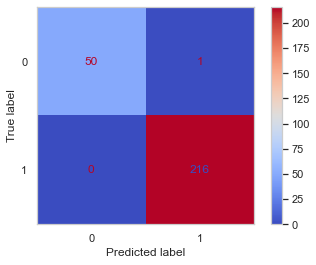

In [136]:
# predictions
y_pred_1=Untuned_clf.predict(X_test_processed)

# Calculate accuracy
print('Untuned_tree_Accuracy:', accuracy_score(y_test, y_pred_1))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot with customizations
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.coolwarm, ax=ax)
ax.grid(False) 
plt.show()

In [137]:
print("Untuned Decision tree Classification Report\n\n", classification_report(y_test, y_pred_1))


Untuned Decision tree Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       1.00      1.00      1.00       216

    accuracy                           1.00       267
   macro avg       1.00      0.99      0.99       267
weighted avg       1.00      1.00      1.00       267



In [138]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred_1)
tree1_roc_auc = auc(fpr,tpr)
print("Untuned Tree roc auc:",tree1_roc_auc)

Untuned Tree roc auc: 0.9901960784313725


## Plot ROC CURVE

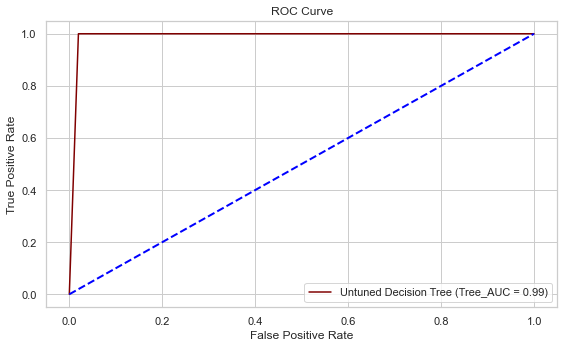

In [139]:
plt.figure(figsize=(8,5))
lw =2
plt.plot(fpr, tpr, label=f'Untuned Decision Tree (Tree_AUC = {tree1_roc_auc:.2f})',color ="maroon")
plt.plot([0, 1], [0, 1],lw =lw,ls ='--',color ="Blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

## Plot the decision tree
Let's see what rules the tree learned by plotting this decision tree, using matplotlib and sklearn's plot_tree function

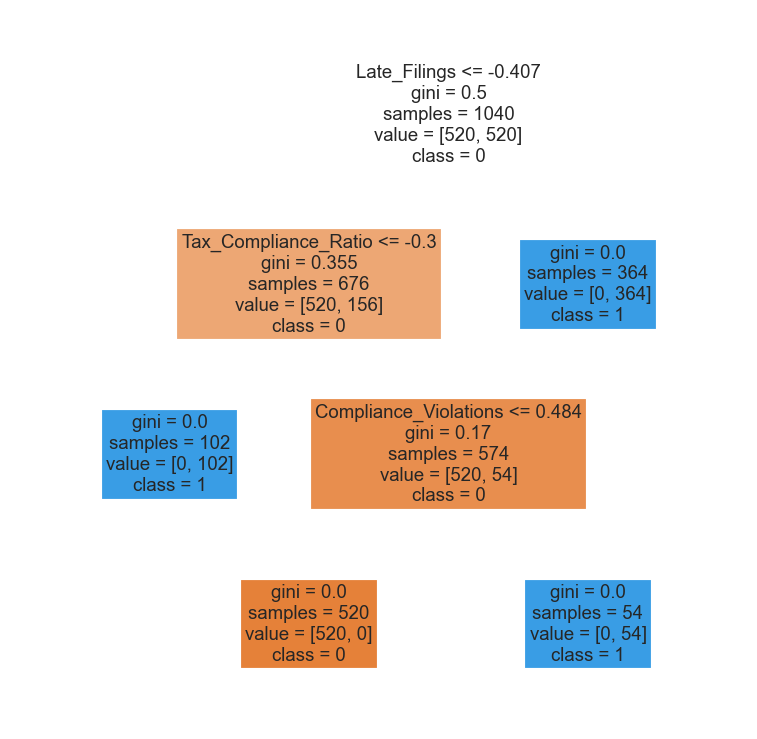

Tree depth: 3
Number of leaves: 4


In [140]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(Untuned_clf,
          feature_names = X_train_smote.columns,
          class_names=np.unique(y).astype('str'),
          filled = True)
plt.show()
print("Tree depth:", Untuned_clf.get_depth())
print("Number of leaves:", Untuned_clf.get_n_leaves())

## MODEL 3:TUNED DECISION TREE MODEL

## ⟬ A ⟭ Re-grow the tree using entropy
Let's change the default splitting criterion from Gini impurity to entropy and re-grow the decision tree

In [141]:
# Instantiate and fit a DecisionTreeClassifier
Tuned_clf = DecisionTreeClassifier(criterion = 'entropy',random_state=SEED)
Tuned_clf.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Make predictions


Untuned_tree_Accuracy: 0.9962546816479401


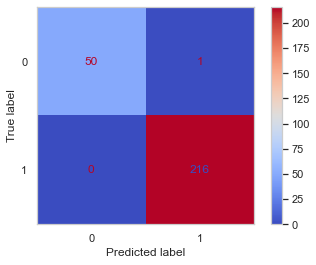

In [142]:
# predictions
y_pred_2=Tuned_clf.predict(X_test_processed)

# Calculate accuracy
print('Untuned_tree_Accuracy:', accuracy_score(y_test, y_pred_2))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot with customizations
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.coolwarm, ax=ax)
ax.grid(False) 
plt.show()

In [143]:
print("Tuned Decision tree Classification Report\n\n", classification_report(y_test, y_pred_2))

Tuned Decision tree Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       1.00      1.00      1.00       216

    accuracy                           1.00       267
   macro avg       1.00      0.99      0.99       267
weighted avg       1.00      1.00      1.00       267



# ROC & AUC

In [144]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred_2)
tree2_roc_auc = auc(fpr,tpr)
print("Tuned Tree roc_auc:",tree2_roc_auc)

Tuned Tree roc_auc: 0.9901960784313725


## Plot ROC CURVE

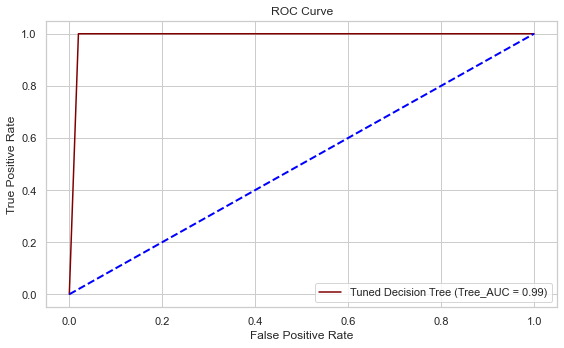

In [145]:
plt.figure(figsize=(8,5))
lw =2
plt.plot(fpr, tpr, label=f'Tuned Decision Tree (Tree_AUC = {tree2_roc_auc:.2f})',color ="maroon")
plt.plot([0, 1], [0, 1],lw =lw,ls ='--',color ="Blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# Plot and show decision tree

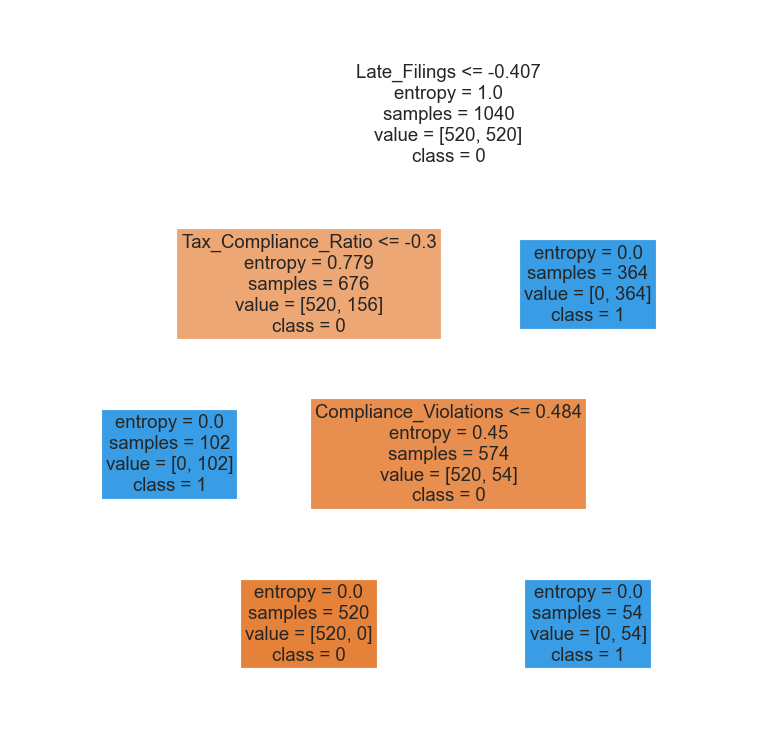

Tree depth: 3
Number of leaves: 4


In [146]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(Tuned_clf,
          feature_names = X_train_smote.columns,
          class_names=np.unique(y).astype('str'),
          filled = True)
plt.show()
print("Tree depth:", Tuned_clf.get_depth())
print("Number of leaves:", Tuned_clf.get_n_leaves())

## ⟬ B ⟭ Hyperparameter Tuning and Pruning in Decision Trees


- Since Decision trees are prone to overfitting ,effective pruning can reduce this likelihood

### ⟦ 1 ⟧ Manual evaluation of the optimal Hyperparameters

## 1.MAX DEPTH

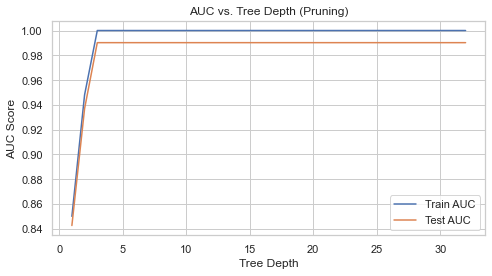

In [147]:
depths =range(1,33)
train_auc=[]
test_auc = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth = d, criterion='entropy', random_state = SEED)
    clf.fit(X_train_smote, y_train_smote)

    y_train_pred = clf.predict_proba(X_train_smote)[:,1]
    y_test_pred = clf.predict_proba(X_test_processed)[:,1]

    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))# use the fpr and tpr and not the threshold
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

plt.figure(figsize=(7, 4))
plt.plot(depths, train_auc, label="Train AUC")
plt.plot(depths, test_auc, label="Test AUC")
plt.xlabel("Tree Depth")
plt.ylabel("AUC Score")
plt.title("AUC vs. Tree Depth (Pruning)")
plt.legend()
plt.tight_layout()
plt.show()

Maximum depth = 4

## 2. Minimum sample split

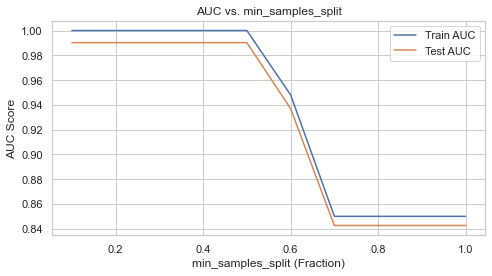

In [148]:
#minimum_splits : minimum number of samples needed to split an internal node. lets test values from 0.1 to 1.0.
maximum_splits = np.arange(0.1, 1.1, 0.1)
train_auc = []
test_auc = []

for s in maximum_splits:
    clf = DecisionTreeClassifier(min_samples_split=s, criterion='entropy', random_state=SEED)
    clf.fit(X_train_smote, y_train_smote)

    y_train_pred = clf.predict_proba(X_train_smote)[:, 1]
    y_test_pred = clf.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(maximum_splits, train_auc, label="Train AUC")
plt.plot(maximum_splits, test_auc, label="Test AUC")
plt.xlabel("min_samples_split (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_split")
plt.legend()
plt.tight_layout()
plt.show()

Minimum sample split = 0.5

# 3. Minimum sample leaf

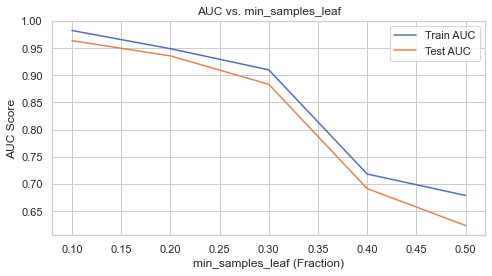

In [149]:
#min_samples_leaf :Controls the minimum number of samples required to be at a leaf node

leafs = np.arange(0.1, 0.6, 0.1)
train_auc = []
test_auc = []

for l in leafs:
    clf = DecisionTreeClassifier(min_samples_leaf=l, criterion='entropy', random_state=SEED)
    clf.fit(X_train_smote, y_train_smote)

    y_train_pred = clf.predict_proba(X_train_smote)[:, 1]
    y_test_pred = clf.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

plt.figure(figsize=(7, 4))
plt.plot(leafs, train_auc, label="Train AUC")
plt.plot(leafs, test_auc, label="Test AUC")
plt.xlabel("min_samples_leaf (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_leaf")
plt.legend()
plt.tight_layout()
plt.show()

Minimum sample leaf = 0.2

# 4.Maximum features

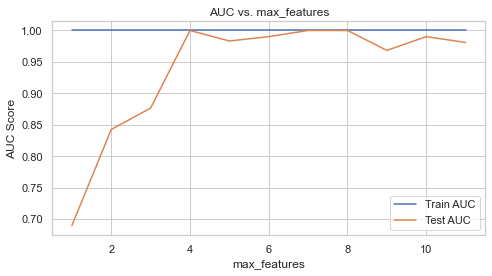

In [150]:
max_features = range(1, X.shape[1] + 1)
train_auc = []
test_auc = []

for f in max_features:
    clf = DecisionTreeClassifier(max_features=f, criterion='entropy', random_state=SEED)
    clf.fit(X_train_smote, y_train_smote)

    y_train_pred = clf.predict_proba(X_train_smote)[:, 1]
    y_test_pred = clf.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(max_features, train_auc, label="Train AUC")
plt.plot(max_features, test_auc, label="Test AUC")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.title("AUC vs. max_features")
plt.legend()
plt.tight_layout()
plt.show()

Maximum features = 4

# Final pruned Decision Tree

Manually pruned roc_auc: 0.9647331154684096


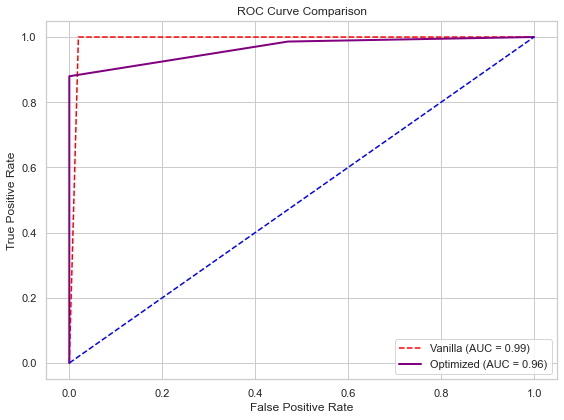

In [151]:
dt_pruning1 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 4,
    min_samples_split=0.5,
    min_samples_leaf=0.2,
    max_features= 4,
    
    random_state=SEED)

dt_pruning1.fit(X_train_smote, y_train_smote)

y_pred_pruned = dt_pruning1.predict_proba(X_test_processed)[:, 1]
fpr_opt, tpr_opt,thresholds = roc_curve(y_test, y_pred_pruned)
roc_auc_pruned = auc(fpr_opt, tpr_opt)

print("Manually pruned roc_auc:",roc_auc_pruned)


# Plotting 
plt.figure(figsize=(8, 6))
lw =2
plt.plot(fpr, tpr, label=f'Vanilla (AUC = {tree1_roc_auc:.2f})', linestyle='--',color ="red")
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {roc_auc_pruned:.2f})', lw =lw,color ="purple")
plt.plot([0, 1], [0, 1], 'k--',color ="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


### ⟦ 2 ⟧ Use GridSearchCV

In [152]:
# Define your classifier with fixed random state for reproducibility
Untuned_clf= DecisionTreeClassifier(random_state=SEED)

# Define a parameter grid with multiple hyperparameters to tune
param_grid = {
    'max_depth': range(1, 21),                 
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],              
    'max_features': [None, 'sqrt', 'log2']     
}

# Set up GridSearchCV with 5-fold cross-validation and ROC AUC scoring
grid_search = GridSearchCV(estimator=Untuned_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search on your training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best combination of hyperparameters found
print("Best parameters found:", grid_search.best_params_)

# Get the best model with tuned hyperparameters
best_clf = grid_search.best_estimator_


Best parameters found: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Final Pruned roc_auc: 0.929057734204793


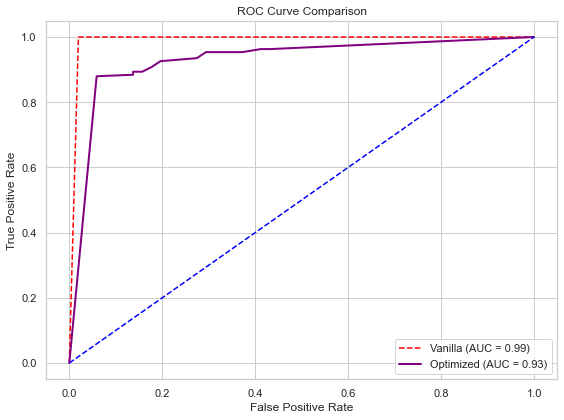

In [153]:
dt_pruning2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=11,                  
    min_samples_split=10,          
    min_samples_leaf=4,            
    max_features='sqrt',           
    random_state=SEED
)

dt_pruning2.fit(X_train_smote, y_train_smote)

# Predict probabilities for ROC curve (positive class probabilities)
y_pred_pruned = dt_pruning2.predict_proba(X_test_processed)[:, 1]

# Compute ROC curve and AUC
fpr_opt, tpr_opt, thresholds = roc_curve(y_test, y_pred_pruned)
roc_auc_pruned = auc(fpr_opt, tpr_opt)
print("Final Pruned roc_auc:",roc_auc_pruned)

# Plotting 
plt.figure(figsize=(8, 6))
lw =2
plt.plot(fpr, tpr, label=f'Vanilla (AUC = {tree1_roc_auc:.2f})', linestyle='--',color ="red")
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {roc_auc_pruned:.2f})', lw =lw,color ="purple")
plt.plot([0, 1], [0, 1], 'k--',color ="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


# MODEL  PERFORMANCE EVALUATION 

In [161]:

def evaluate_model_performance(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a classification model on test data and prints performance metrics:
    Accuracy, Classification Report, and ROC AUC (no plots).
    """
    # Predict class labels
    y_pred = model.predict(X_test)
    
    # Predict probabilities for positive class (1)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = y_pred  # fallback for models without probability or decision output
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    
    
    
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")


In [162]:
evaluate_model_performance(logreg, X_test_processed, y_test, "Logistic Regression")
evaluate_model_performance(Untuned_clf, X_test_processed, y_test, "Untuned Decision Tree")
evaluate_model_performance(Tuned_clf, X_test_processed, y_test, "Tuned Decision Tree")
evaluate_model_performance(dt_pruning1, X_test_processed, y_test, "Manually Pruned Decision Tree")
evaluate_model_performance(dt_pruning2, X_test_processed, y_test, "GridSearch cv Pruned Decision Tree")


Logistic Regression Accuracy: 0.9176
Logistic Regression ROC AUC: 0.9817

Untuned Decision Tree Accuracy: 0.9963
Untuned Decision Tree ROC AUC: 0.9902

Tuned Decision Tree Accuracy: 0.9963
Tuned Decision Tree ROC AUC: 0.9902

Manually Pruned Decision Tree Accuracy: 0.9026
Manually Pruned Decision Tree ROC AUC: 0.9647

GridSearch cv Pruned Decision Tree Accuracy: 0.9026
GridSearch cv Pruned Decision Tree ROC AUC: 0.9291


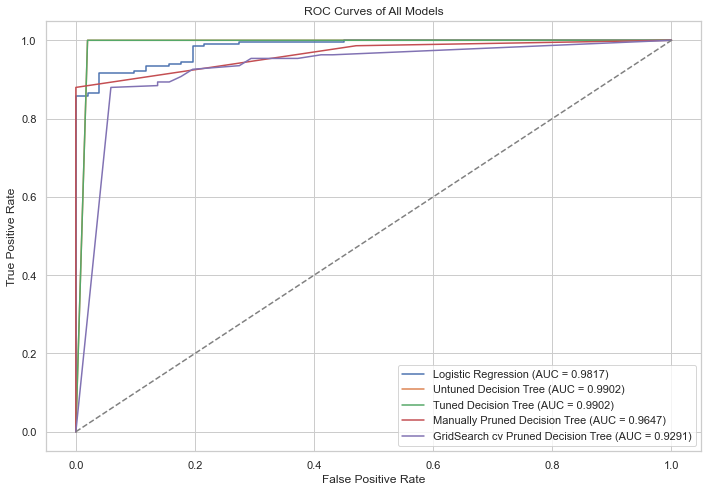

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List of models and names
models = [
    (logreg, "Logistic Regression"),
    (Untuned_clf, "Untuned Decision Tree"),
    (Tuned_clf, "Tuned Decision Tree"),
    (dt_pruning1, "Manually Pruned Decision Tree"),
    (dt_pruning2, "GridSearch cv Pruned Decision Tree")
]

plt.figure(figsize=(10, 7))

for model, name in models:
    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_processed)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_processed)
    else:
        y_proba = model.predict(X_test_processed)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Model Evaluation Summary

After evaluating all five models on the test set, here are the results:

| Model                                | Accuracy | ROC AUC |
|-------------------------------------|----------|---------|
| **Logistic Regression**                 | 0.9176   | 0.9817  |
| **Untuned Decision Tree**               | 0.9963   | 0.9902  |
| **Tuned Decision Tree**                 | 0.9963   | 0.9902  |
| **Manually Pruned Decision Tree**      | 0.9026   | 0.9647  |
| **GridSearchCV Pruned Decision Tree**  | 0.9026   | 0.9291  |

I used **SMOTE** to address class imbalance, so I consider both accuracy and ROC AUC as reliable performance metrics.

- The **untuned and tuned decision trees** achieved the highest accuracy (99.63%) and strong ROC AUC (~0.9902), indicating excellent performance.
- **Logistic Regression** had slightly lower accuracy (91.76%) but maintained a high ROC AUC (0.9817), showing good class separation.
- **Pruned Decision Trees** showed reduced accuracy (~90%) and lower ROC AUC, suggesting that pruning may have led to underfitting.

### Final Model Choice

**Selected Model:** Tuned Decision Tree  
It delivers top-tier performance and has been tuned for better generalization.

**Fallback Option:** Logistic Regression  
Chosen for its simplicity and robustness in case overfitting is detected during further validation.


## Business Recommendations

1. **Adopt Advanced Ensemble Models**  
Leverage Random Forests and Gradient Boosting techniques to improve prediction accuracy and model stability, thereby reducing risks associated with relying on a single decision tree.

2. **Expand Feature Set and Data Volume**  
Invest in acquiring additional relevant data and enriching the feature set to enhance model insights and overall performance, enabling more informed business decisions.

3. **Deploy User-Friendly Applications**  
Currently, the model exists only as a notebook. To enable business stakeholders to interact with and interpret the model outputs effectively, develop interactive web applications or dashboards that simplify access and usability.

4. **Evaluate and Address Bias**  
Continuously assess the model for fairness to ensure equitable outcomes across all user groups, protecting ethical standards and maintaining the company’s reputation.
